## Preface

In [1]:
# Symbols
from sympy import *
from sympy.plotting import plot_parametric
import numpy as np
import scipy
import scipy.special

init_printing(use_unicode=True)

x,y,z,t,mu,nu=symbols('x y z t mu nu')
k,m,n=symbols('k m n', integer=True)
f,g,h=symbols('f g h', cls=Function)

R=S.Reals
C=S.Complexes

i=sqrt(-1)

In [2]:
# Plotting Setup
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

from matplotlib import animation, rc
from IPython.display import HTML


import matplotlib.pyplot as plt

from IPython.display import set_matplotlib_formats, HTML
set_matplotlib_formats('svg', 'retina')

## Taylor Series of $\cos x$

In [3]:
def taylor(f, var, a, order):
    return sum([Rational(1,factorial(n)) * (var - a)**n * diff(f,var,n).subs(var,a) for n in range(order+1)])

### Taylor of $\cos(x)$ at $x=0$

In [4]:
f = cos(x)

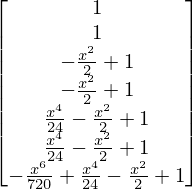

In [5]:
f_taylor = Matrix([taylor(f,x,0,n) for n in range(7)])
f_taylor

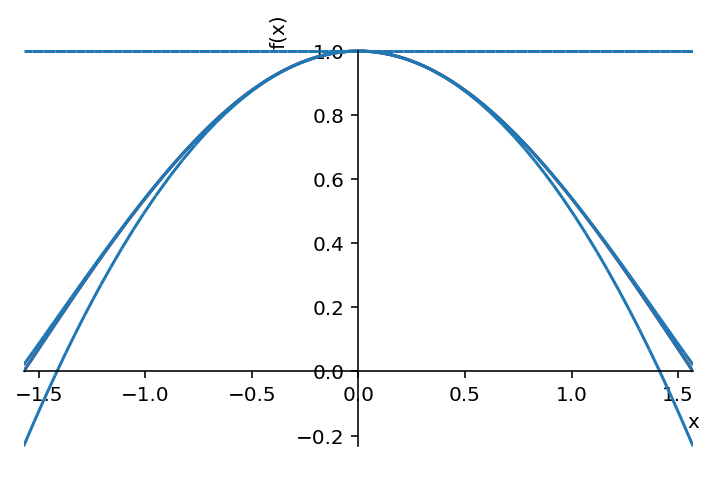

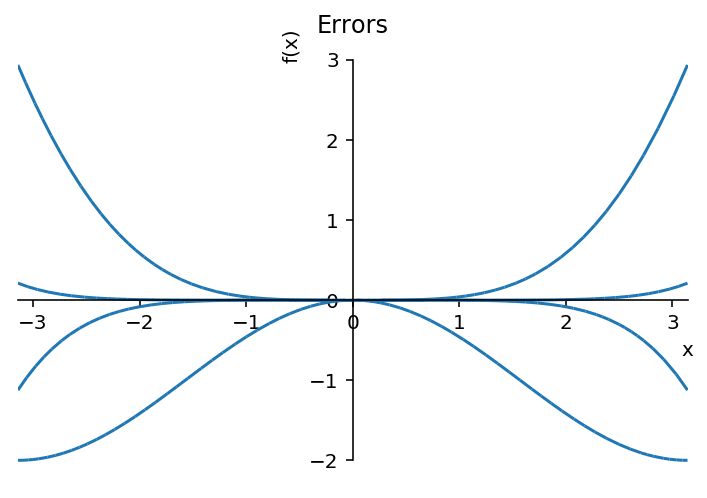

In [6]:
p = plot(f,f_taylor[0],f_taylor[2],f_taylor[4],f_taylor[6],(x, -pi/2, pi/2),show=False)
p[0].line_color='r'
p.show()

p = plot(f-f_taylor[0],f-f_taylor[2],f-f_taylor[4],f-f_taylor[6],(x, -pi, pi),show=False,title='Errors')
p.show()

### Taylor of $\cos(x)$ at $x=1$

In [7]:
f = cos(x)
a = 1

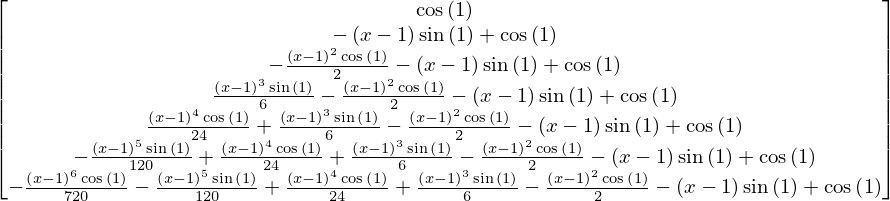

In [8]:
f_taylor = Matrix([taylor(f,x,a,n) for n in range(7)])
f_taylor

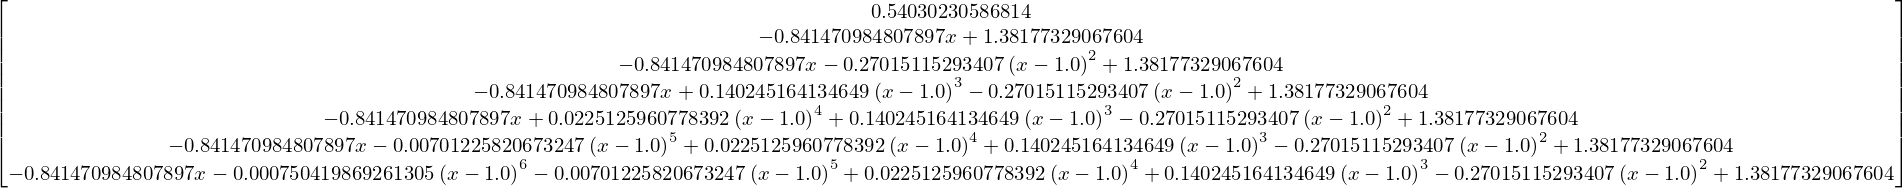

In [9]:
Matrix([f_taylor[n].evalf() for n in range(len(f_taylor))])

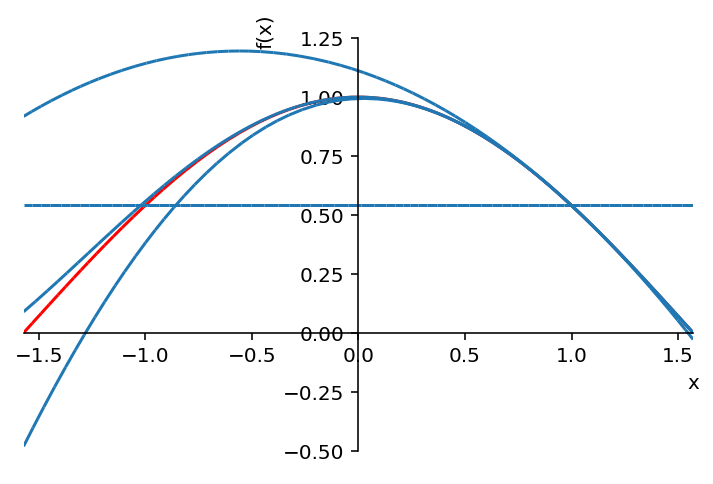

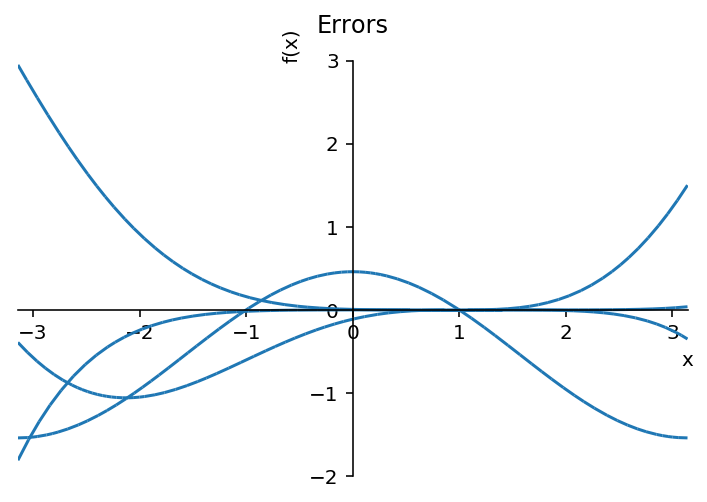

In [10]:
p = plot(f,f_taylor[0],f_taylor[2],f_taylor[4],f_taylor[6],(x, -pi/2, pi/2),show=False)
p[0].line_color='r'
p.show()

p = plot(f-f_taylor[0],f-f_taylor[2],f-f_taylor[4],f-f_taylor[6],(x, -pi, pi),show=False,title='Errors')
p.show()

## Taylor series for polynomials

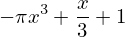

In [11]:
f = 1+x*Rational(1,3)-x**3*pi
a = 0
f

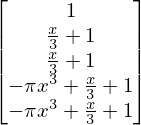

In [12]:
f_taylor = Matrix([taylor(f,x,a,n) for n in range(5)])
f_taylor

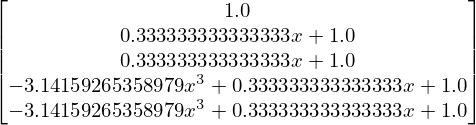

In [13]:
Matrix([f_taylor[n].evalf() for n in range(len(f_taylor))])

For such a polynomial function, the Taylor series will converge everywhere, no matter the choice of $a$.

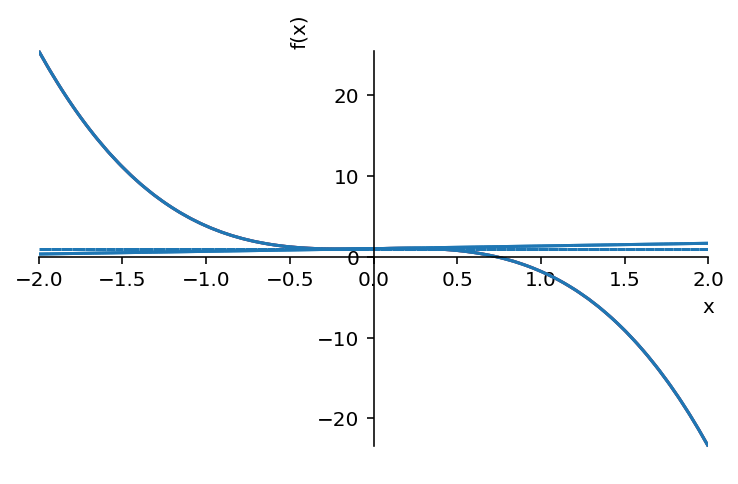

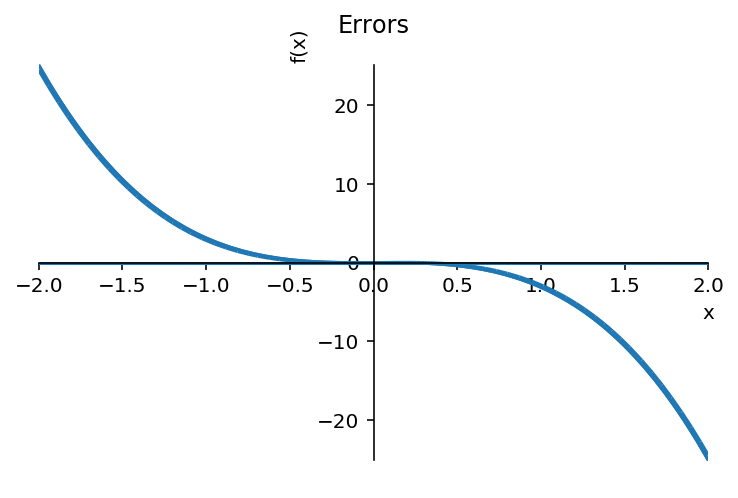

In [14]:
p = plot(f,f_taylor[0],f_taylor[1],f_taylor[2],f_taylor[3],f_taylor[4],(x, -2, 2),show=False)
p[0].line_color='r'
p.show()
p = plot(f-f_taylor[0],f-f_taylor[1],f-f_taylor[2],f-f_taylor[3],f-f_taylor[4],(x, -2, 2),show=False,title='Errors')
p.show()

## Taylor series for piecewise functions

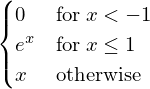

In [15]:
f = Piecewise((0, x < -1), (exp(x), x <= 1), (x, True))
a = 0
f

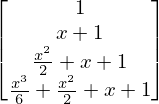

In [16]:
f_taylor = Matrix([taylor(f,x,a,n) for n in range(4)])
f_taylor

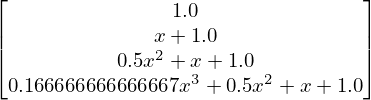

In [17]:
Matrix([f_taylor[n].evalf() for n in range(len(f_taylor))])

For such a piecewise function, the Taylor series will only covnverge to the function for the piece around $a=0$.

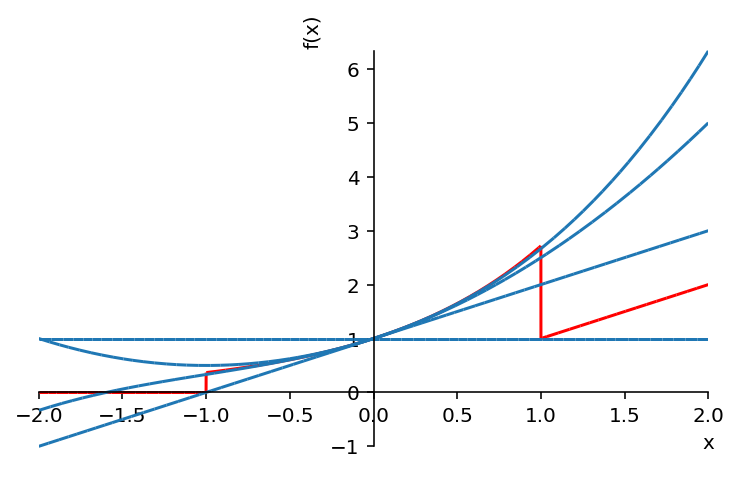

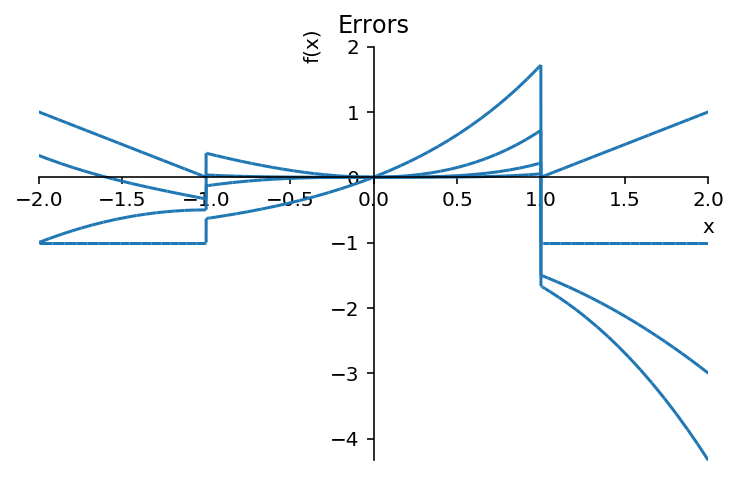

In [18]:
p = plot(f,f_taylor[0],f_taylor[1],f_taylor[2],f_taylor[3],(x, -2, 2),show=False)
p[0].line_color='r'
p.show()
p = plot(f-f_taylor[0],f-f_taylor[1],f-f_taylor[2],f-f_taylor[3],(x, -2, 2),show=False,title='Errors')
p.show()